# **ASSIGNMENT-5**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1.Consider a periodic square wave with time period T = 2 seconds having
magnitude 1 between t = 0 s and t = 1 s and zero elsewhere. Let g(t) be
the Fourier series representation of the square wave.

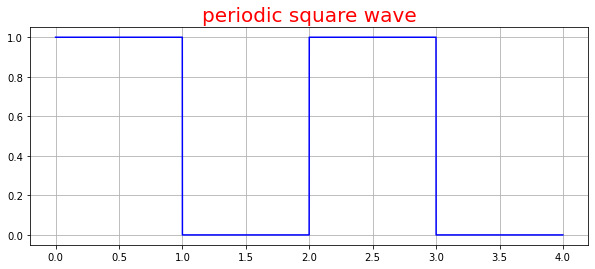

In [2]:
fig=plt.figure(1,figsize=(10,4))
secs=4
num=1000
period =2
t=np.arange(0,4,1/1000)
x=np.empty([num*secs])
sum1=0
for i in range(num*secs):
    if int(i/num)%period<1:
        x[i]=1
    else:
        x[i]=0
    sum1+=x[i]
plt.plot(t,x,c='b')
plt.title("periodic square wave",color='red',size=20)
plt.grid()

1.(a)Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph. This plot is useful to see the
emergence of the square wave as the number of terms in the representation increases.

In [5]:
#we define function for fourier series
def fs(x,N,P,t):
    u=1/(t*P)
    a=np.empty([N])
    b=np.empty([N])
    N1=len(x)/secs
    for i in range(N):
        a[i]=0
        b[i]=0
        for j in range(len(x)):
            a[i]+=x[j]*np.cos(2*np.pi*j*i/(N1*P))
            b[i]+=x[j]*np.sin(2*np.pi*j*i/(N1*P))
        if i==0:
            a[i]*=u
        else:
            a[i]*=2*u
        b[i]*=2*u
    return a,b
#we define function for  inverse fourier series
def Ifs(a,b,T):
    y=np.empty([num*secs])
    N2=len(y)/secs
    for t in range(len(y)):
        y[t]=0
        for m in range(len(a)):
            y[t]+=a[m]*np.cos(2*np.pi*m*t/(N2*T))+b[m]*np.sin(2*np.pi*m*t/(N2*T))
    return(y)

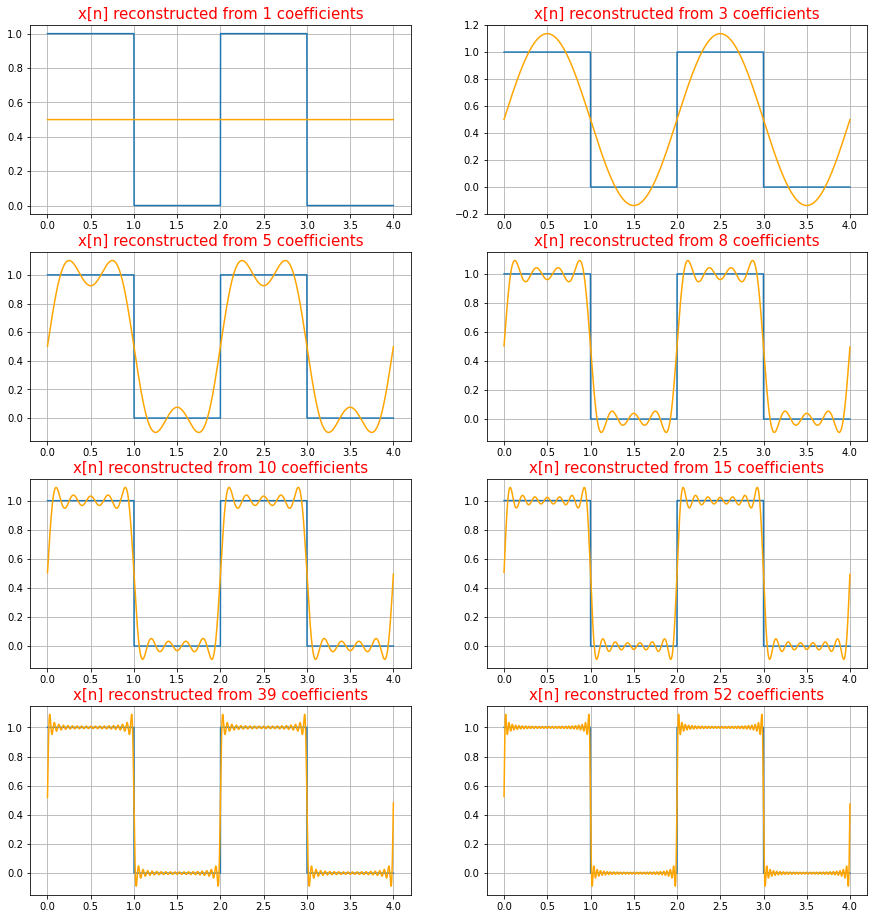

In [6]:
fig=plt.figure(1,figsize=(15,16))
c=1
li=[1,3,5,8,10,15,39,52]
for i in range(len(li)):
    plt.subplot(4,2,c)
    a,b=fs(x,li[i],period,sum1)
    y=Ifs(a,b,period)
    plt.plot(t,x)
    plt.gca().set_title('x[n] reconstructed from '+ str(li[i])+' coefficients',color='red',size=15)
    plt.plot(t,y,c='orange')
    plt.grid()
    c = c+1

1.(b)What happens to the Gibbs phenomenon when the number of
terms becomes large

For periodic signals with discontinuities such as a periodic square wave even we have a large number of harmonics will not be sufficient to reproduce the square wave exactly
but For continuous periodic signals wehave sufficiently large number of harmonics which can be used to approximate the signal.
this effect is known as Gibbs phenomenon and it manifests itself in the form of ripples of increasing frequency and an overshootcloser to the transitions of the square signal.

2.A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is
sampled at 100 times per second for 0.99 seconds and then its DFT is
computed

In [7]:
def dft(x,N):
    t = []
    for k in range(N):
        a = 0
        for n in range(N):
            a += x[n]*np.exp(-2j*np.pi*k*n*(1/N))
        t.append(a)
    return t
def idft(t,N):
    x = []
    for n in range(N):
        a = 0
        for k in range(N):
            a += t[k]*np.exp((2j*np.pi*k*n)/N)
        a /= N
        x.append(a)
    return x
def powerspd(x):
    psd=[]
    N=len(x)
    y=np.arange(0,N,1)
    for i in list(y):
        psd.append((abs(x[i])**2)/N)
    return psd

2.(a)Plot the power spectral density and visualize the Spectral Leakage.

<StemContainer object of 3 artists>

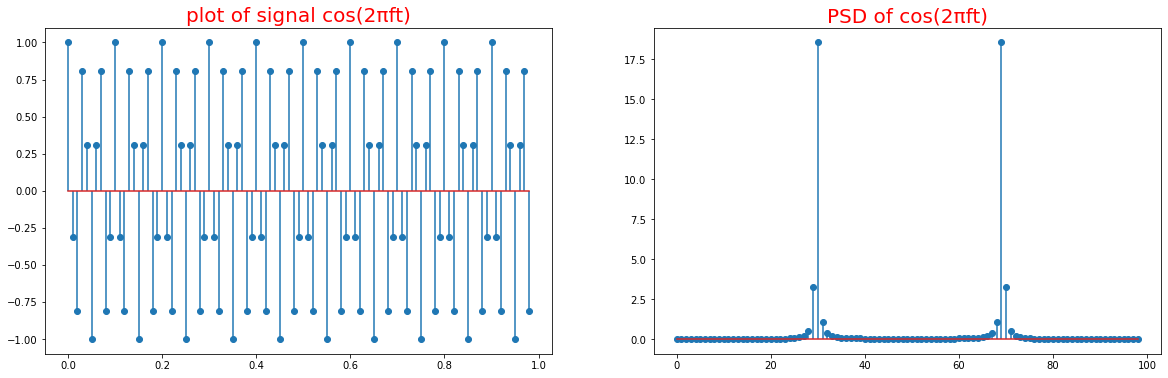

In [8]:
plt.figure(figsize=(20,6))
f=30
t=np.arange(0,0.99,0.01)
x=np.cos(2*np.pi*f*t) 
plt.subplot(1,2,1)
plt.title('plot of signal cos(2πft)',color='red',size=20)
plt.stem(t,x,use_line_collection=True)
x2=dft(x,99)
plt.subplot(1,2,2)
plt.title('PSD of cos(2πft)',color='red',size=20)
plt.stem(powerspd(x2),use_line_collection=True)

2.(b)Using various window functions such as Hanning, Hamming, Bartlett
etc. try to minimize the Spectral Leakage. Show the plots in each
case.

In [9]:
def hann(total_data):
    hann_array = np.zeros(total_data)
    for i in range(total_data):
        hann_array[i] = 0.5 - 0.5 * np.cos((2 * np.pi * i) / (total_data - 1))
    return hann_array
def hamm(g):
    hann_array = np.zeros(g)
    for i in range(g):
        hann_array[i] = 0.5386 - 0.46164 * np.cos((2 * np.pi * i) / (g - 1))
    return hann_array
def bart(M):
    b=[]
    m=(M-1)/2
    for i in range(M):
        b.append( (1/m)*(m-abs(i-m)) )
    return np.array(b)

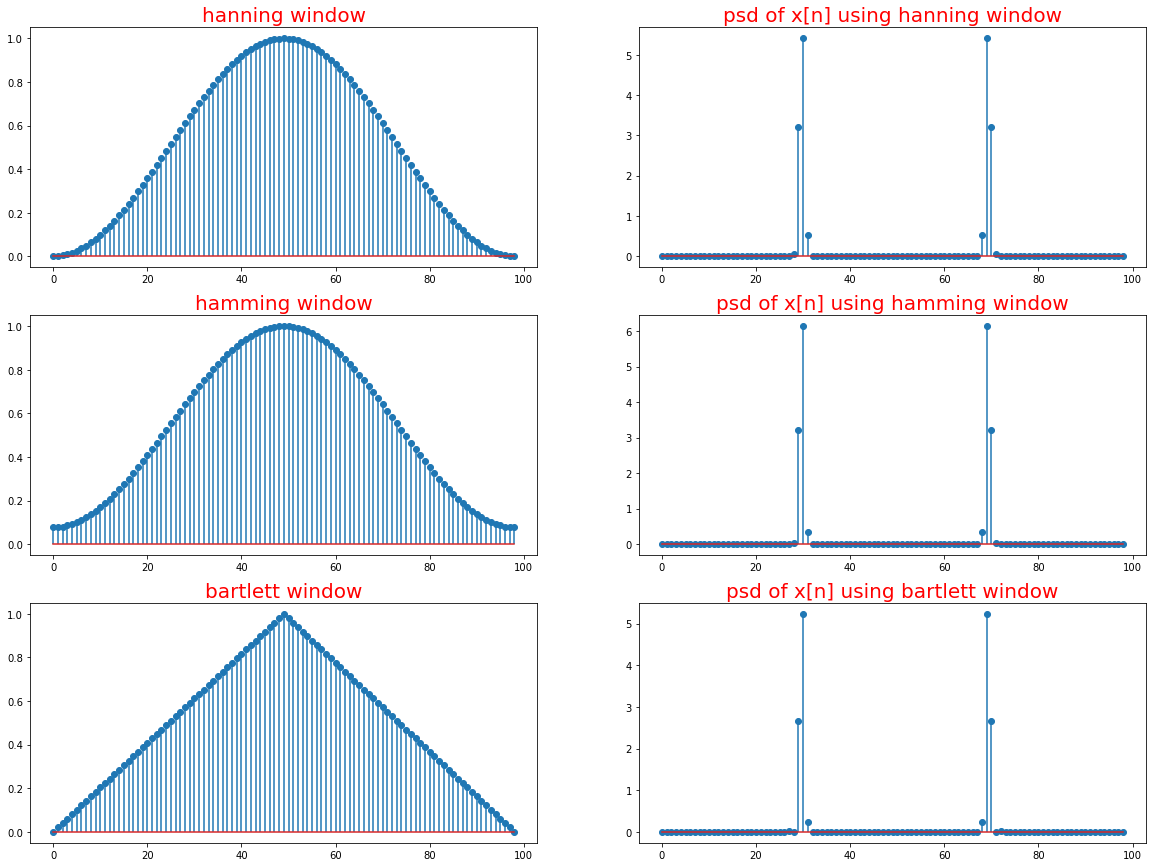

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.title('hanning window',color='red',size=20)
plt.stem(hann(99),use_line_collection=True)
x1 = x * hann(99)
x2= dft(x1,len(x1))
plt.subplot(3,2,2)
plt.title('psd of x[n] using hanning window',color='red',size=20)
plt.stem(powerspd(x2),use_line_collection=True)
plt.subplot(3,2,3)
plt.title('hamming window',color='red',size=20)
plt.stem(hamm(99),use_line_collection=True)
x3 = x * hamm(99)
x4= dft(x3,len(x3))
plt.subplot(3,2,4)
plt.title('psd of x[n] using hamming window',color='red',size=20)
plt.stem(powerspd(x4),use_line_collection=True)
plt.subplot(3,2,5)
plt.title('bartlett window',color='red',size=20)
plt.stem(bart(99),use_line_collection=True)
x5 = x* bart(99)
x6 = dft(x5,len(x5))
plt.subplot(3,2,6)
plt.title('psd of x[n] using bartlett window',color='red',size=20)
plt.stem(powerspd(x6),use_line_collection=True)
plt.show()

3.Consider the signal x(t) = cos(2πf1t) + cos(2πf2t) where f1 = 10 Hz and
f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is
corrupted with white noise having zero mean and unit variance

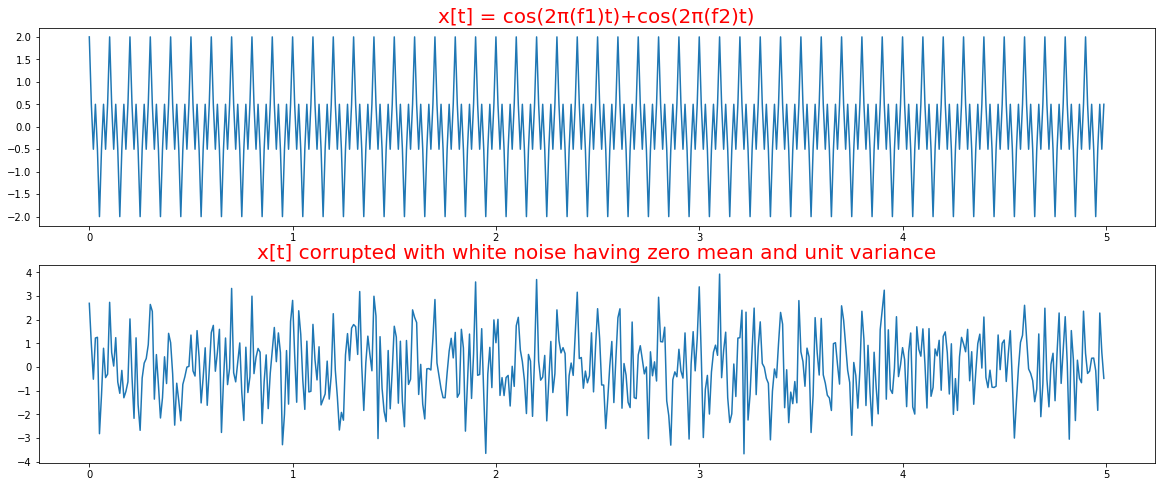

In [11]:
plt.figure(figsize=(20,8))
f1 = 10 
f2 = 30 
t=np.arange(0,5,1/100)
x7 = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)
plt.subplot(2,1,1)
plt.title('x[t] = cos(2π(f1)t)+cos(2π(f2)t)',color='red',size=20)
plt.plot(t,x7)
whitenoise = np.random.normal(0,1,500)
y=x7+whitenoise
plt.subplot(2,1,2)
plt.title('x[t] corrupted with white noise having zero mean and unit variance',color='red',size=20)
plt.plot(t,y)

3(a) Find the power spectral density of y(t) and show a labelled plot.

<Figure size 1440x576 with 0 Axes>

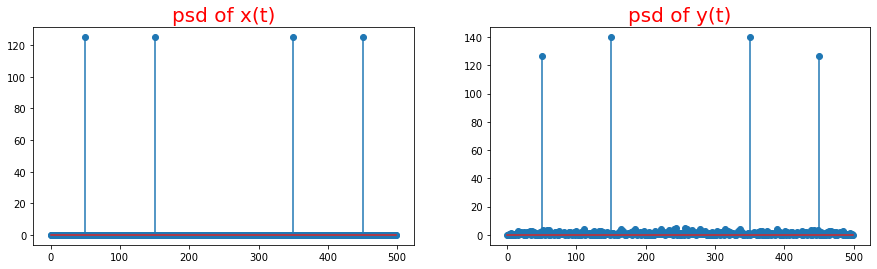

In [12]:
plt.figure(figsize=(20,8))
x8 = dft(x7,len(x7))
fig = plt.figure(2,figsize=(15,4))
plt.subplot(1,2,1)
plt.title('psd of x(t)',color='red',size=20)
plt.stem(powerspd(x8),use_line_collection=True)
plt.subplot(1,2,2)
x9 = dft(y,len(y))
psdy=powerspd(x9)
plt.title('psd of y(t)',color='red',size=20)
plt.stem(powerspd(x9),use_line_collection=True)
plt.show()

3(b) From the PSD, find a suitable threshold for denoising the signal

In [13]:
#From the PSD of y(t), we can chose threshold of 20 

3(c) Recover x(t) from y(t) using the threshold. Show the necessary plots

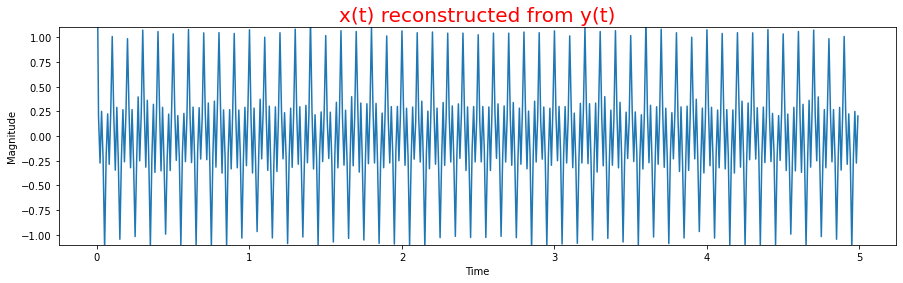

In [14]:
threshold = len(psdy) > 100
thr_y= psdy*threshold
recover = np.real(idft(thr_y,len(thr_y)))
fig =plt.figure(figsize=(15,4))
plt.plot(t,recover)
plt.title('x(t) reconstructed from y(t)',color='red',size=20)
plt.ylim(-1.10,1.10)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()